<a href="https://colab.research.google.com/github/Arpon-30/CVPR/blob/main/Final%20/%20mnist%20_digit%20_detection%20/%20Assignment1__Digit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
%matplotlib inline

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print()
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#5): Which is digit 2


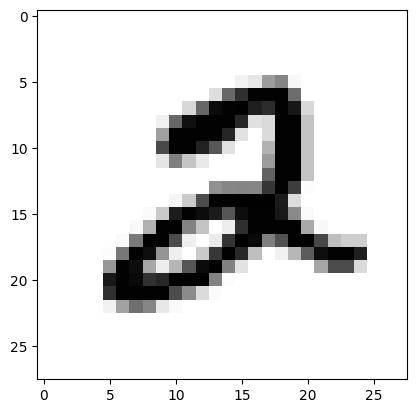

In [ ]:
digit=5
a=x_train[digit]
plt.imshow(a,cmap='gray_r')
print(f"Image (#{digit}): Which is digit {y_train[digit]}")

Visual dataset

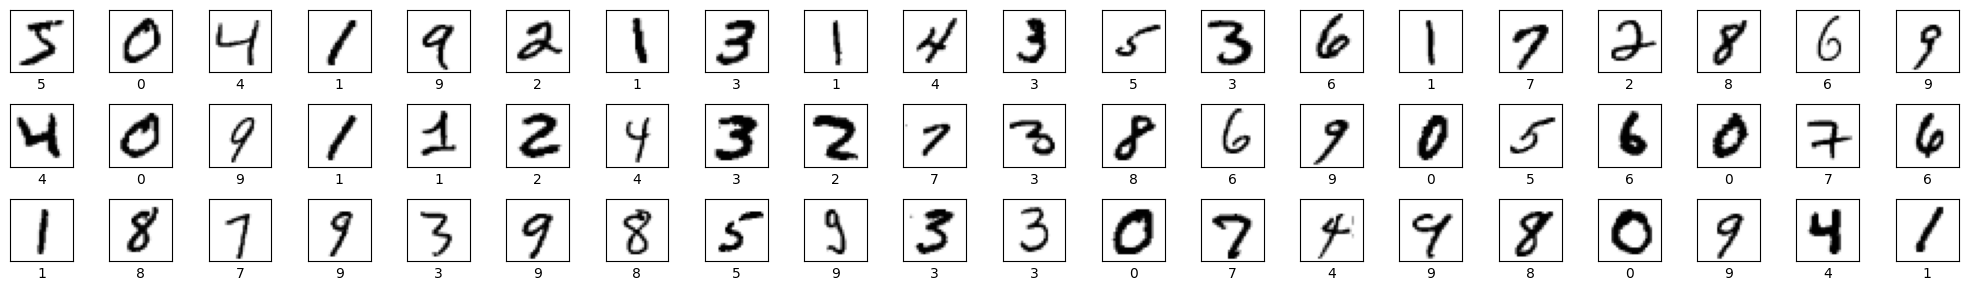

In [ ]:
rows=3
cols=20
i=0

plt.figure(figsize=(20,3))
for r in range(rows):
  for c in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.gray_r)

    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
    i+=1
plt.tight_layout()
plt.show()

Normalise Data

In [ ]:
x_train=x_train.reshape(-1,28*28).astype('float32')/255.0
x_test=x_test.reshape(-1,28*28).astype('float32')/255.0

Image (#5): Which is digit '2'


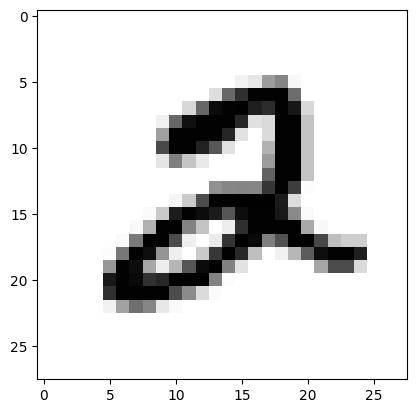

In [ ]:
digit=5

a=x_train[digit].reshape(28,28)
plt.imshow(a,cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

Build the model

In [ ]:
model=keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(units=256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=64,activation='relu'),
    layers.Dropout (0.5),

    #layers.Dense(units=32,activation='relu'),
    #layers.Dropout(0.3),
    #layers.Dense(units=32,activation='relu'),
    #layers.Dropout(0.2),





    layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Train the model

In [ ]:
h=model.fit(x=x_train,y=y_train,epochs=5,batch_size=64,validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5665 - loss: 1.2620 - val_accuracy: 0.9349 - val_loss: 0.2308
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8960 - loss: 0.3864 - val_accuracy: 0.9505 - val_loss: 0.1805
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9260 - loss: 0.2879 - val_accuracy: 0.9589 - val_loss: 0.1505
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9330 - loss: 0.2535 - val_accuracy: 0.9606 - val_loss: 0.1458
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9429 - loss: 0.2243 - val_accuracy: 0.9642 - val_loss: 0.1357


Plot the model training result

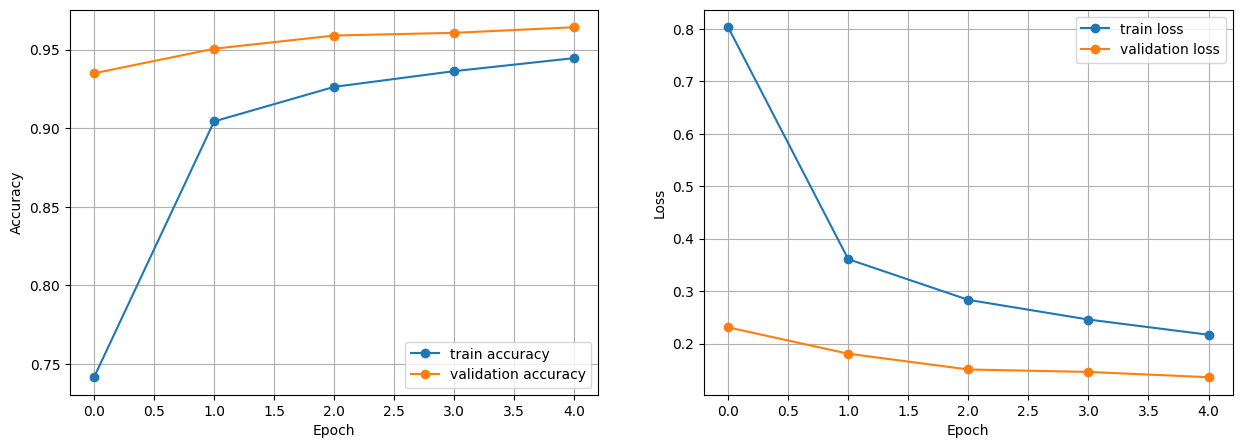

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'o-',label='train accuracy')
plt.plot(h.history['val_accuracy'],'o-',label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'],'o-',label='train loss')
plt.plot(h.history['val_loss'],'o-',label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Evaluate the model on the test dataset

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.1392

Test accuracy: 0.9674999713897705


In [ ]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


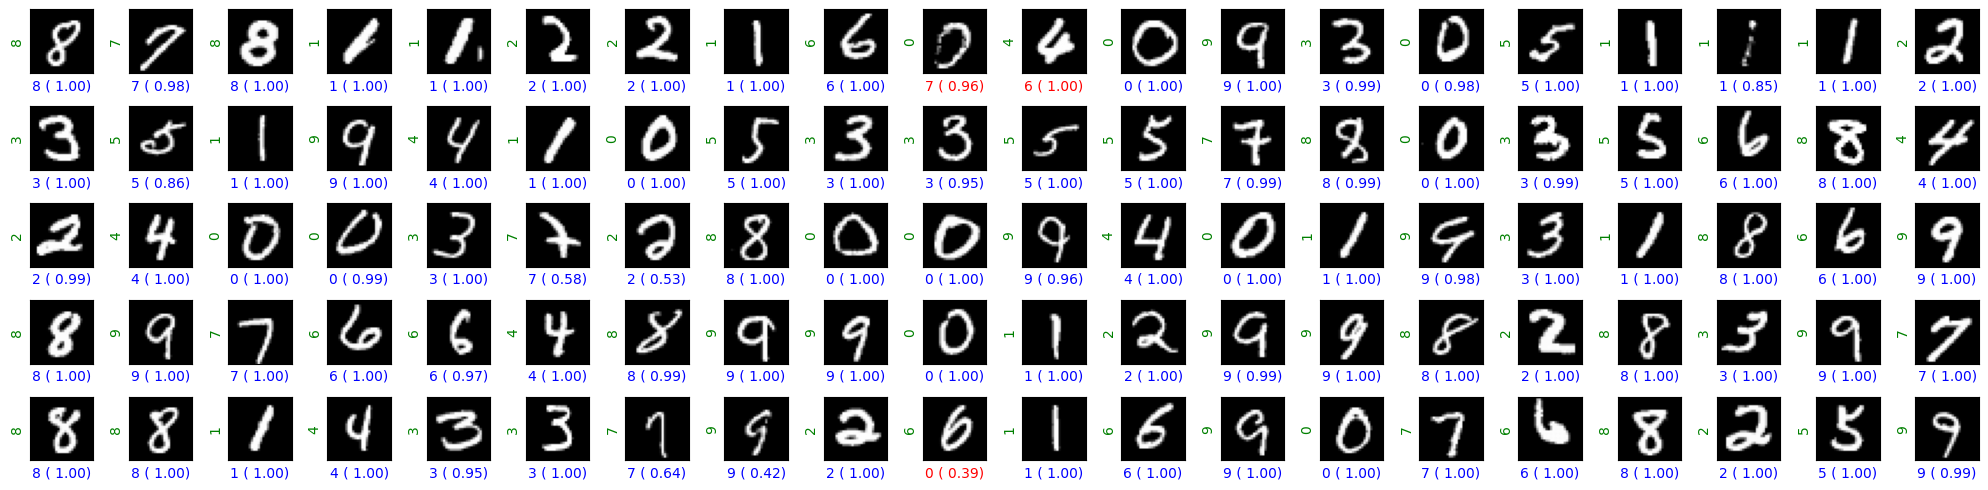

In [ ]:
rows=5
cols=20

random_indices=random.sample(range(x_test.shape[0]),rows*cols)
sample_images=x_test[random_indices,:]
sample_labels=y_test[random_indices]
predictions=model.predict(sample_images)

i=0

plt.figure(figsize=(20,5))

for r in range(rows):
  for c in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(sample_images[i].reshape(28,28),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    prediction=np.argmax(predictions[i])
    confidence=predictions[i][prediction]
    if sample_labels[i]==prediction:
      plt.xlabel(f"{prediction} ({confidence: .2f})",color='b')
    else:
      plt.xlabel(f"{prediction} ({confidence: .2f})",color='r')
    plt.ylabel(sample_labels[i],color='g')
    i+=1
plt.tight_layout()
plt.show()

In [ ]:
model.save("Assignment digit detection.h5")




In [ ]:
from google.colab import files
files.download("Assignment digit detection.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>